In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_cleaned = pd.read_pickle('ICO-Cleaned.pickle')

In [3]:
df_cleaned.shape#26 cols

(3305, 26)

In [4]:
#country - transform the empty ones to a title 'empty' - then do 3 categories - empty, if country is in countries with over 100 icos setup in it and sub 100
# then 
(df_cleaned.country.value_counts() <100).value_counts()
df_cleaned.country.value_counts().head(10)

USA            429
               353
UK             245
Russia         243
Singapore      240
Switzerland    156
Estonia        145
Hong Kong       86
Australia       74
Canada          66
Name: country, dtype: int64

In [5]:
def empty_country(row):
    if row['country']=='':
        return 'empty'
    else:
        return (row['country'])
df_cleaned.country = df_cleaned.apply(lambda x: empty_country(x),axis=1)
#plus_100 = ['USA', 'UK', 'Russia', 'Singapore', 'Switzerland', 'Estonia']


In [6]:
def plus_low(row):
    plus_100 = ['USA', 'UK', 'Russia', 'Singapore', 'Switzerland', 'Estonia']
    if row['country'] in  plus_100:
        return 'yes'
    elif row['country'] ==  'empty':
        return 'empty'
    else:
        return 'sub_100'
df_cleaned.country = df_cleaned.apply(lambda x: plus_low(x),axis=1)

In [7]:
print(df_cleaned.country.value_counts())
print(df_cleaned.shape)

sub_100    1494
yes        1458
empty       353
Name: country, dtype: int64
(3305, 26)


In [8]:
# now same for platform - quite clear most use ethereum so split - using ethrereum or not

print(df_cleaned['finance.platform'].value_counts().head())
print(df_cleaned.shape)

Ethereum    2651
             318
Waves         90
Stellar       26
NEO           20
Name: finance.platform, dtype: int64
(3305, 26)


In [9]:
def eth(row):
    if row['finance.platform'] == 'Ethereum':
        return 'Eth'
    else:
        return 'Other'
df_cleaned['finance.platform'] = df_cleaned.apply(lambda x: eth(x),axis=1)

In [10]:
print(df_cleaned['finance.platform'].value_counts().head())
print(df_cleaned.shape)

Eth      2651
Other     654
Name: finance.platform, dtype: int64
(3305, 26)


In [11]:
# now do dummies for both of above

df_cleaned = pd.get_dummies(df_cleaned,columns = ['country','finance.platform'],prefix = ['+100','Platform'],drop_first=True)

In [13]:
df_cleaned.head()

,categories,finance.accepting,finance.raised,finance.tokens,name,rating,ratingProduct,ratingProfile,ratingTeam,ratingVision,...,Pre ICO,financ_bonus,coin_name,restricted?,distrib_finance,ico_length,milestones count,+100_sub_100,+100_yes,Platform_Other
0,1,0,8.244292e+06,14700000,True Flip,4.0,3.3,4.0,4.0,4.7,...,1,0,0,0,10,31,6,1,0,0
0,2,0,2.000000e+06,0,SunContract,3.6,2.6,3.8,4.0,3.0,...,1,0,0,0,0,34,5,1,0,0
0,1,1,1.400575e+07,10000000,DIMCOIN,2.5,0.0,2.5,0.0,0.0,...,1,1,0,0,0,57,4,1,0,1
0,1,1,2.320000e+08,0,Tezos,2.8,2.9,2.6,2.5,3.5,...,1,0,0,0,0,12,0,0,1,1
0,3,0,1.971000e+07,70000000,Rivetz,3.2,3.8,2.9,3.4,4.4,...,1,0,0,0,0,31,0,0,1,1


In [14]:
def raised(row):
    return (row['finance.raised']/1000000)
df_cleaned['raised(mills)'] = df_cleaned.apply(lambda x: raised(x),axis=1)
df_cleaned['raised(mills)'].describe()
#over estimated by the 'TEZOS' ICO - raise 232 million

count    3305.000000
mean        3.691691
std        14.542185
min         0.000000
25%         0.000000
50%         0.000000
75%         0.397916
max       320.000000
Name: raised(mills), dtype: float64

In [15]:
df_cleaned.shape

(3305, 28)

In [16]:
def raised_gut(row):
    if row['raised(mills)']== 0:
        return 'zero'
    elif row['raised(mills)']<=5.5:
        return 'bottom half'
    else:
        return 'top_half'

df_cleaned['raised_good/bad'] = df_cleaned.apply(lambda x: raised_gut(x),axis=1)

In [17]:
df_cleaned.shape

(3305, 29)

In [18]:
df_cleaned.to_pickle('ICOS - transformed.pickle')

In [19]:
df_transf = pd.read_pickle('ICOS - transformed.pickle')

In [ ]:
df_transf[df_transf['raised(mills)']==232]

In [20]:
df_transf = df_transf.reset_index(drop=True)

In [26]:
df_transf.dtypes

categories             int64
finance.accepting      int64
finance.raised       float64
finance.tokens         int64
name                  object
rating               float64
ratingProduct        float64
ratingProfile        float64
ratingTeam           float64
ratingVision         float64
avg_team             float64
avg_vision           float64
avg_product          float64
avg_profile          float64
team count             int64
team rating          float64
links count          float64
Pre ICO                int64
financ_bonus           int64
coin_name              int64
restricted?            int64
distrib_finance        int64
ico_length             int64
milestones count       int64
+100_sub_100           uint8
+100_yes               uint8
Platform_Other         uint8
raised(mills)        float64
raised_good/bad       object
dtype: object

In [31]:
df_wout_zeros = df_transf.loc[df_transf['raised(mills)'] != 0]

In [32]:
df_wout_zeros.columns

Index(['categories', 'finance.accepting', 'finance.raised', 'finance.tokens',
       'name', 'rating', 'ratingProduct', 'ratingProfile', 'ratingTeam',
       'ratingVision', 'avg_team', 'avg_vision', 'avg_product', 'avg_profile',
       'team count', 'team rating', 'links count', 'Pre ICO', 'financ_bonus',
       'coin_name', 'restricted?', 'distrib_finance', 'ico_length',
       'milestones count', '+100_sub_100', '+100_yes', 'Platform_Other',
       'raised(mills)', 'raised_good/bad'],
      dtype='object')

In [33]:
df_transf[['finance.raised','raised(mills)']].mean()

finance.raised    3.691691e+06
raised(mills)     3.691691e+00
dtype: float64

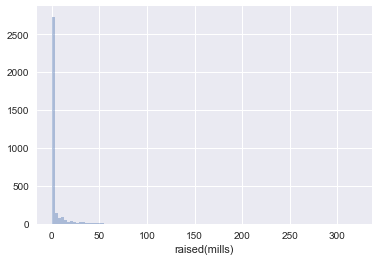

In [34]:
sns.distplot(df_transf['raised(mills)'],kde=False,bins=100)



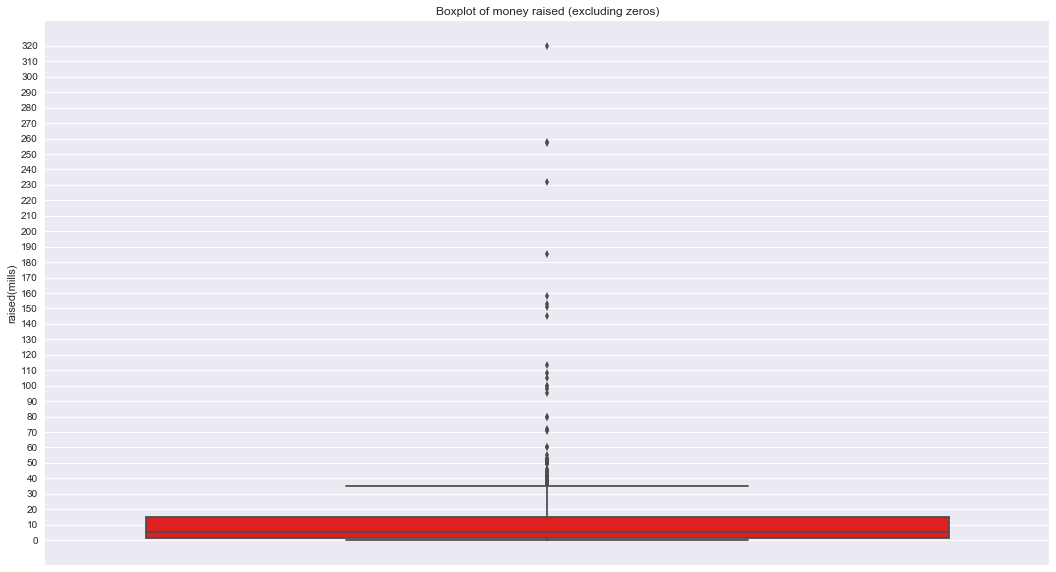

In [35]:
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0, max(df_wout_zeros['raised(mills)'])+1, 10))
sns.boxplot(data=df_wout_zeros,y='raised(mills)',color='red')

plt.title('Boxplot of money raised (excluding zeros)')

In [36]:
df_wout_zeros['raised(mills)'].describe()

count    919.000000
mean      13.276430
std       25.174124
min        0.000026
25%        1.500000
50%        5.500000
75%       15.000000
max      320.000000
Name: raised(mills), dtype: float64

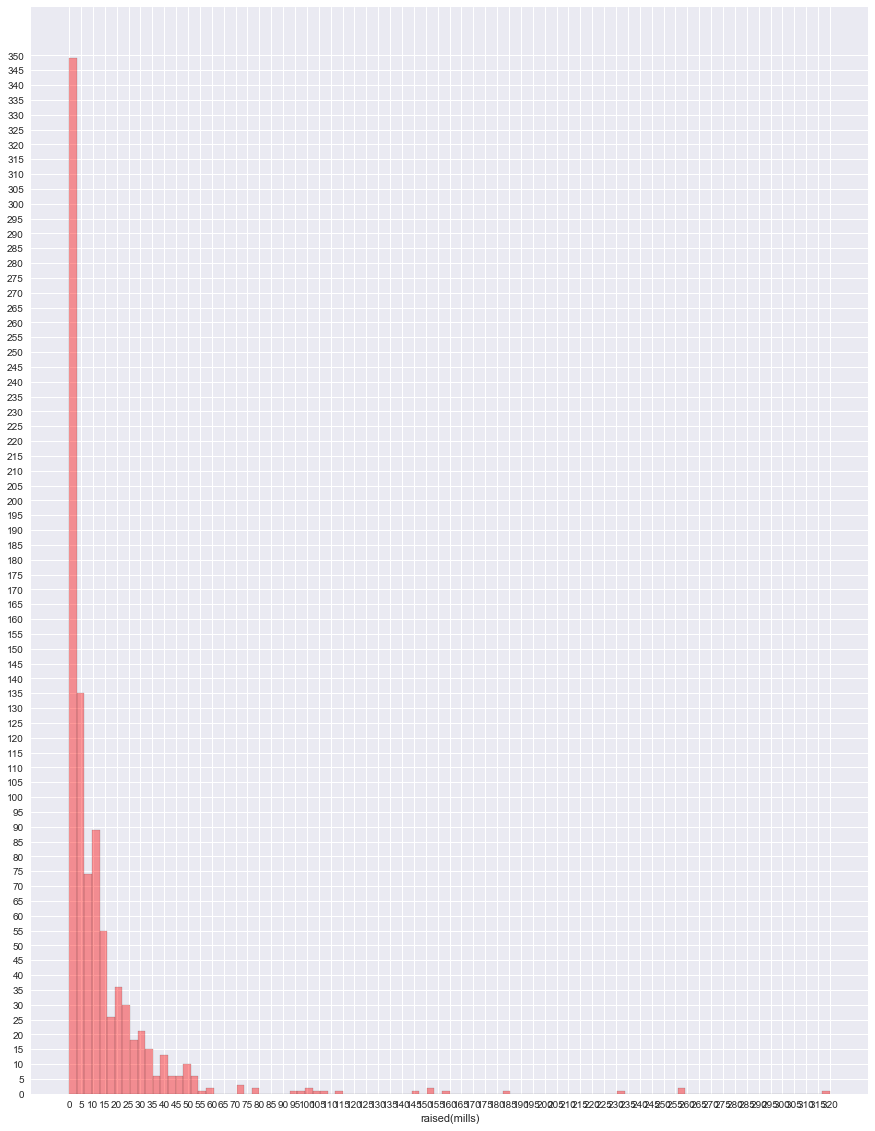

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,20))
plt.rcParams["patch.force_edgecolor"] = True
plt.xticks(np.arange(0, max(df_wout_zeros['raised(mills)'])+1, 5))
plt.yticks(np.arange(0, 355, 5))
sns.distplot(df_wout_zeros['raised(mills)'],kde=False,bins=100,color='red')

([<matplotlib.axis.YTick at 0xccacf98>,
 <a list of 71 Text yticklabel objects>)

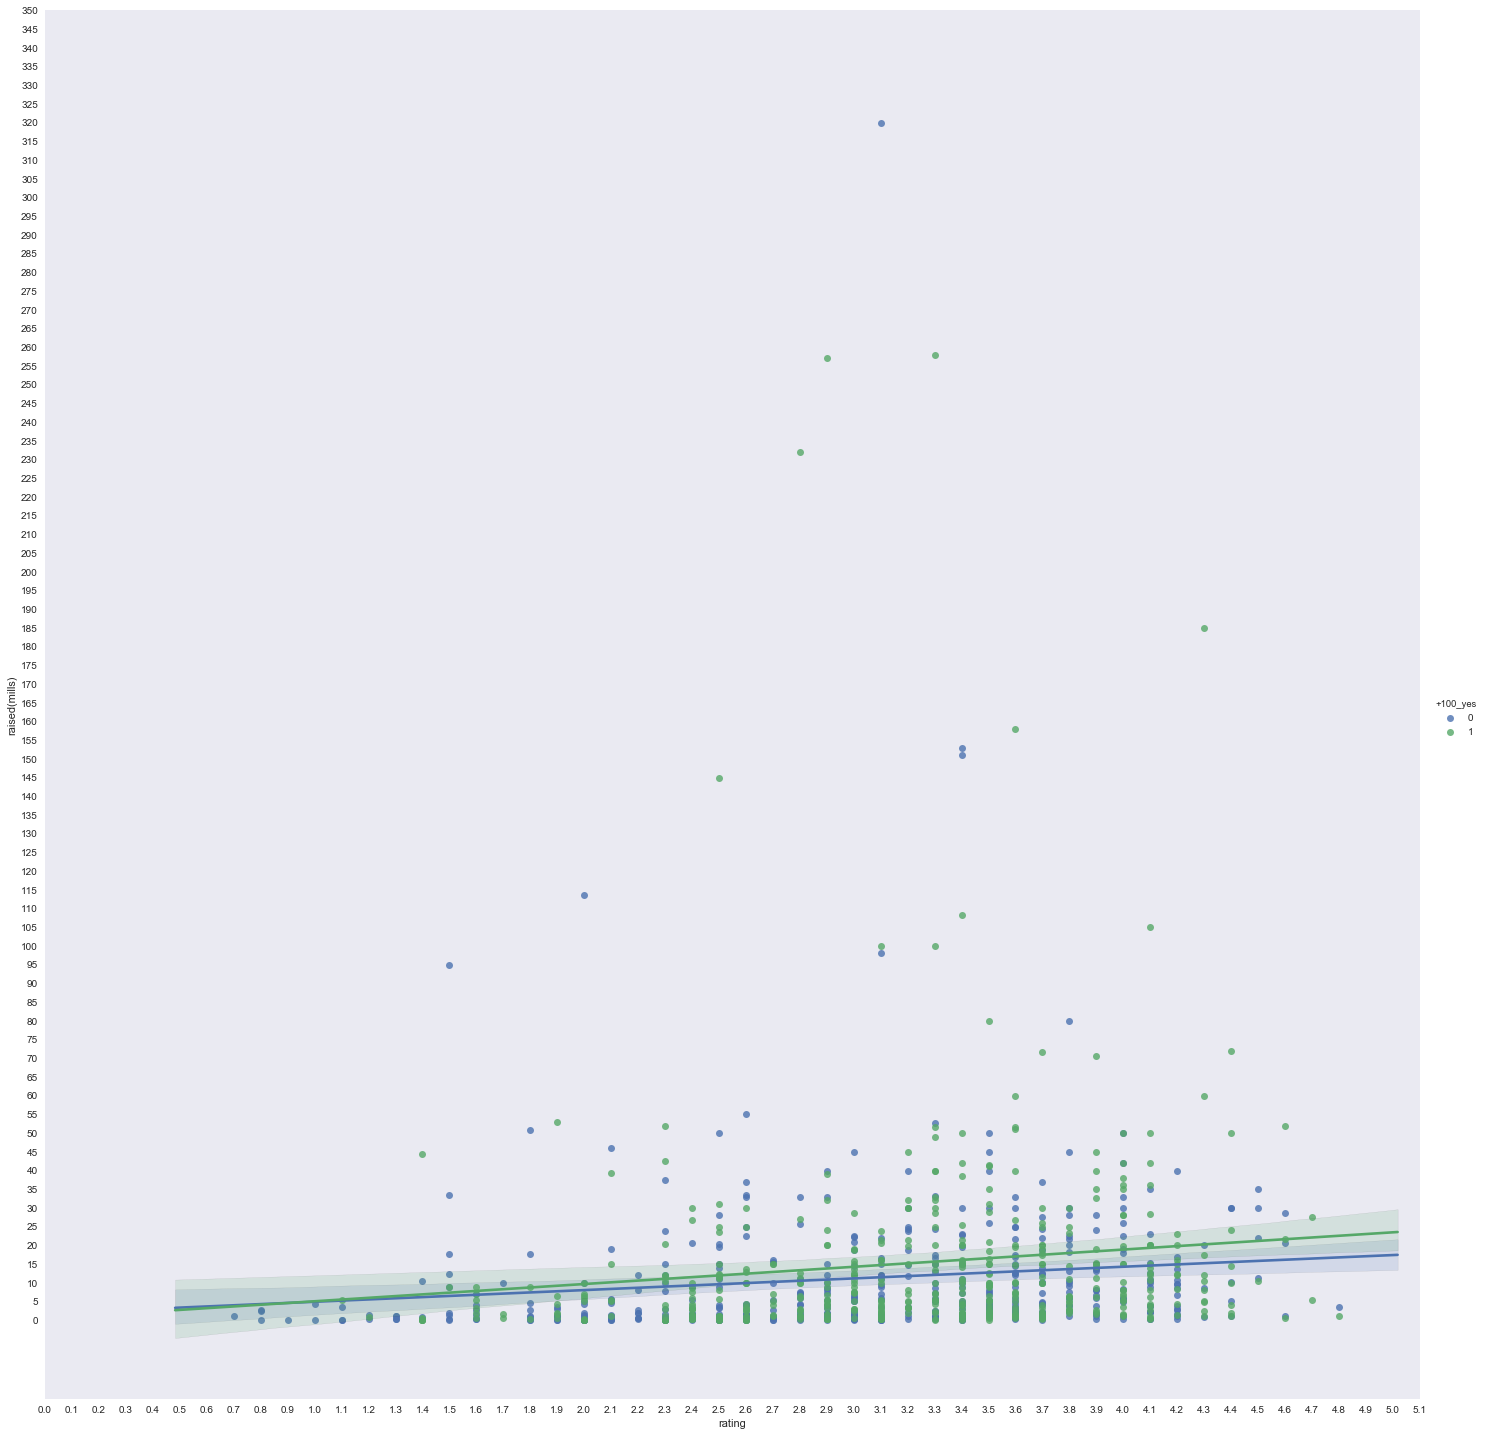

In [38]:
sns.set_style('dark')
sns.lmplot(x = 'rating',y='raised(mills)',data = df_wout_zeros,size=20,hue = '+100_yes')
plt.xticks(np.arange(0, max(df_wout_zeros['rating'])+.4, .1))
plt.yticks(np.arange(0, 355, 5))

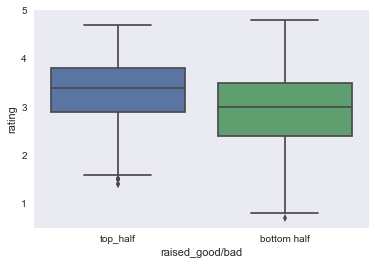

In [39]:
sns.boxplot(y ='rating' ,x ='raised_good/bad' ,data = df_wout_zeros)

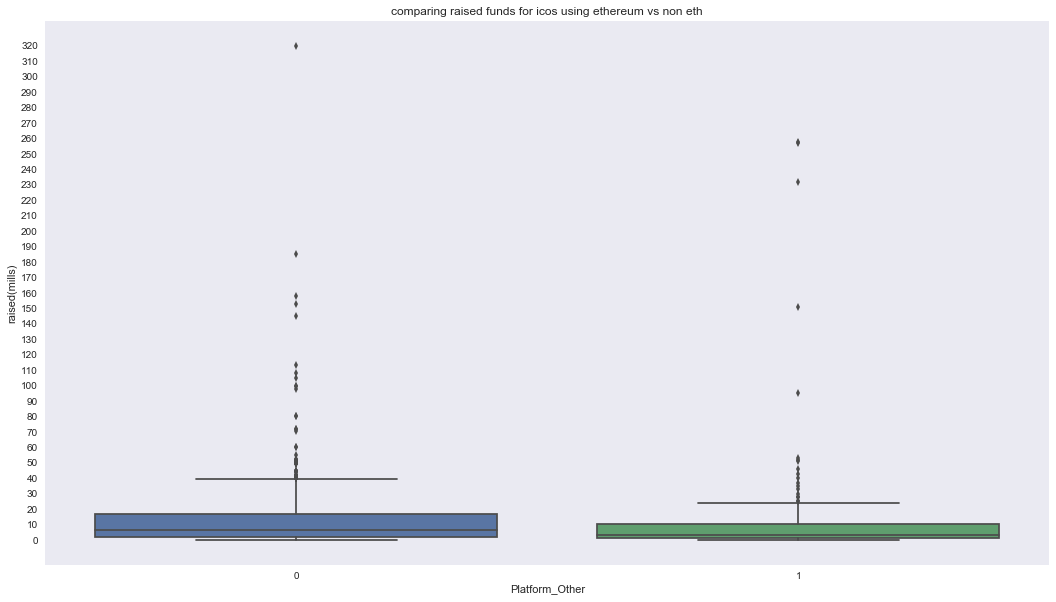

In [41]:
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0, max(df_wout_zeros['raised(mills)'])+1, 10))
sns.boxplot(x ='Platform_Other' ,y ='raised(mills)' ,data = df_wout_zeros)
plt.title('comparing raised funds for icos using ethereum vs non eth')

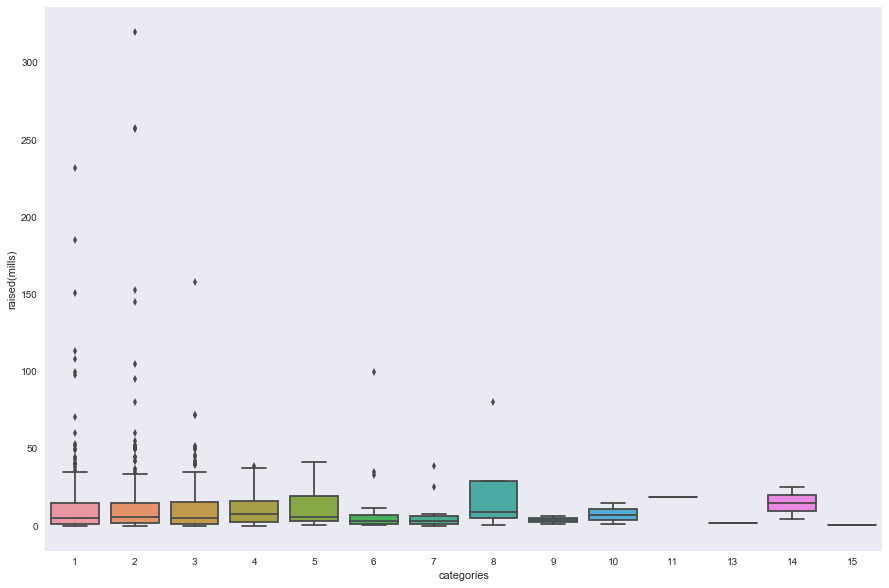

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'categories',y='raised(mills)',data=df_wout_zeros)

In [43]:
#graphs created so pickle the data full data and the ones without the zeros

df_wout_zeros.to_pickle('ICOS - modelwout zeros.pickle')
df_transf.to_pickle('ICOS - model.pickle')